In [1]:
import isxd_reader
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import cv2

matplotlib.rc('image', cmap='inferno')

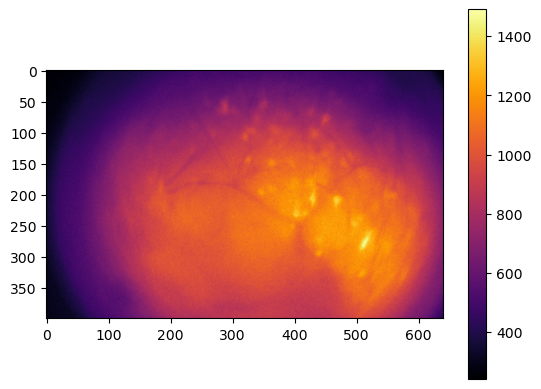

In [2]:
movie_path = "2022-10-14-07-48-47_video.isxd"
plt.imshow(isxd_reader.load_image2(movie_path, index = 13))
plt.colorbar()

In [3]:
np.mean(isxd_reader.load_image2(movie_path, index = 13))

794.1568515625

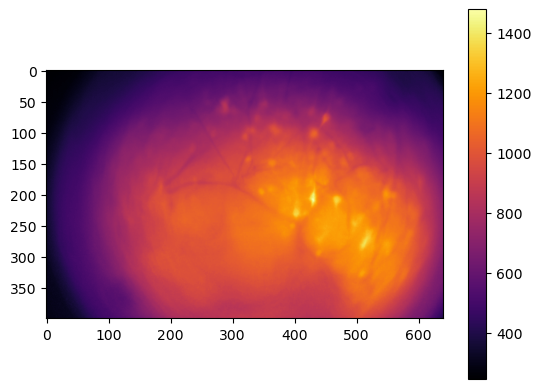

In [4]:
plt.imshow(isxd_reader.mean_of_images(movie_path))
plt.colorbar()

In [5]:
background = isxd_reader.mean_of_images(movie_path)

In [6]:
np.mean(isxd_reader.mean_of_images(movie_path))

789.1897945800781

In [7]:
dff = isxd_reader.load_image2(movie_path, index = 79).astype(np.float64) - background

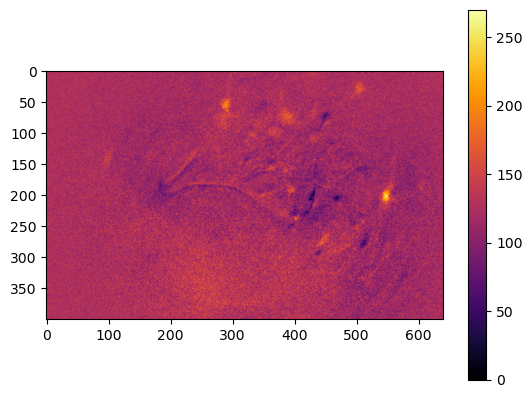

In [8]:
plt.imshow((dff - np.min(dff))[:,:])
plt.colorbar()

In [9]:
# fft_img = np.fft.fft2(dff)
# # fft_img[50:650, 50:650] = 0
# out_img = np.empty_like(np.real(fft_img).astype(np.uint8).copy())
# cv2.fastNlMeansDenoising(np.real(fft_img).astype(np.uint8).copy(), out_img, 20)

# fig, axs = plt.subplots(1,2,figsize=(15,15))
# axs[0].imshow(dff)
# axs[1].imshow(np.real(np.fft.ifft2(out_img)))
# # plt.plot(np.abs(fft_img[0,:]))
# # plt.imshow(np.log(np.abs(np.fft.fftshift(out_img))))

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

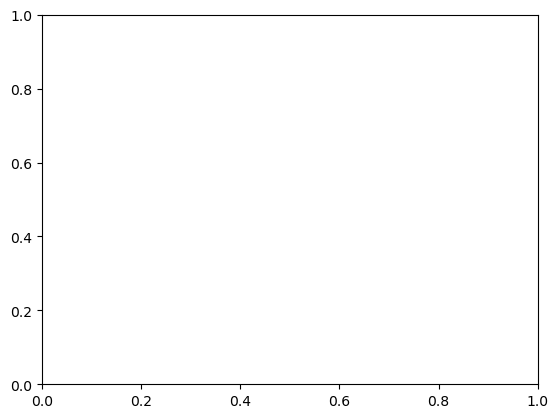

In [10]:
plt.subplots()

In [11]:
dff.shape

(400, 640)

In [12]:
np.max(isxd_reader.load_image(movie_path, index = 13))

4080

In [13]:
np.max(isxd_reader.load_image(movie_path, index = 13).astype(np.float64))

4080.0

In [14]:
np.max(isxd_reader.load_image(movie_path, index = 79))

4080

In [15]:
np.max(isxd_reader.load_image(movie_path, index = 79).astype(np.float64) - background)

3816.7125

In [16]:
background.dtype

dtype('float64')

In [17]:
np.max(isxd_reader.load_image(movie_path, index = 13) - background)

3816.7125

In [18]:
np.min(np.absolute(isxd_reader.load_image(movie_path, index = 13) - background))

0.0

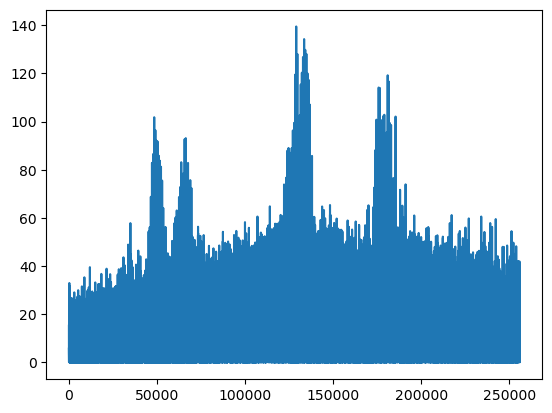

In [19]:
plt.plot(np.ravel(np.absolute(isxd_reader.load_image2(movie_path, index = 13) - background)))

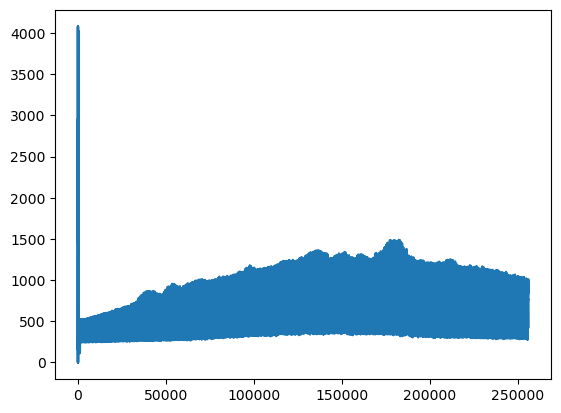

In [66]:
plt.plot(np.ravel(isxd_reader.load_image(movie_path, index = 13)))

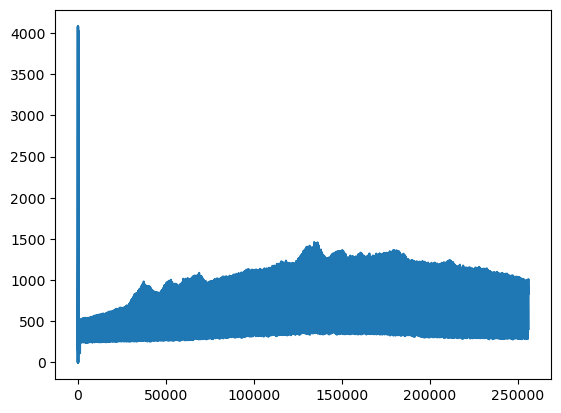

In [21]:
plt.plot(np.ravel(isxd_reader.load_image(movie_path, index = 73)))

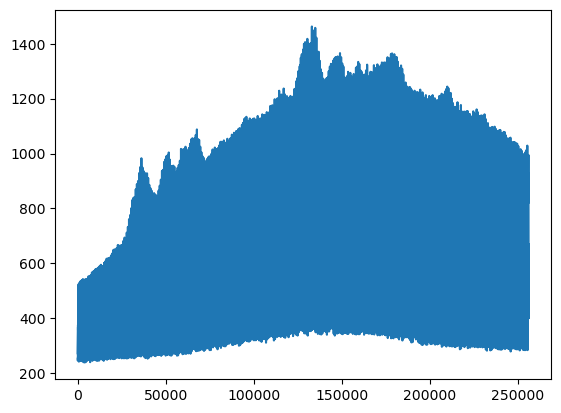

In [64]:
plt.plot(np.ravel(isxd_reader.img_stack(movie_path)[73]))

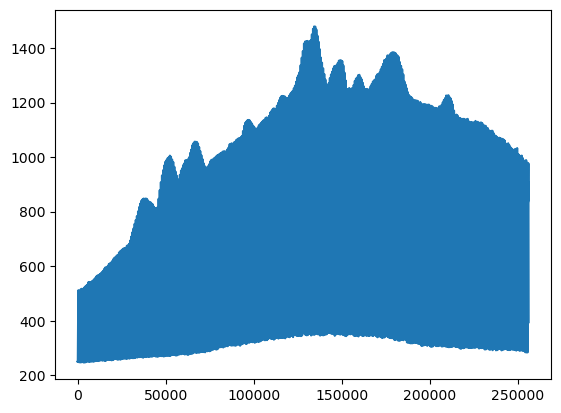

In [22]:
plt.plot(np.ravel(background))

In [23]:
np.min(background)

247.01250000000007

In [24]:
# import pdb
# pdb.set_trace()
full_stack = isxd_reader.img_stack(movie_path)

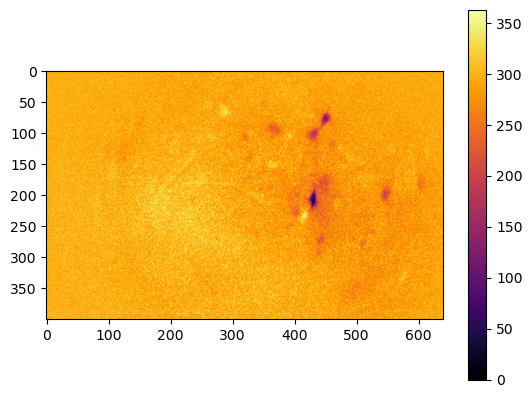

In [25]:
plt.imshow(full_stack[0,:,:] - background - np.min(full_stack[0,:,:] - background))
plt.colorbar()

In [26]:
def dff(image, background=background):
    return image - background - np.min(np.reshape(image - background, (background.shape[0]*background.shape[1], -1)))

In [27]:
def mse(a, b):
    return np.sum((a - b)**2)/a.shape[-1]/a.shape[-2]

In [28]:
mse(dff(full_stack[2,:,:]), dff(full_stack[1,:,:]))

291.2359798828193

In [29]:
def get_similar(full_stack, index, num_imgs):
    other_inds = [index-1, index+1]
    out_stack = np.empty((num_imgs, full_stack.shape[1], full_stack.shape[2]))
    def add_img(i, side):
        # side = 0 if adding previous, side=1 if adding next
        out_stack[i, :, :] = full_stack[other_inds[side],:,:]
        other_inds[side] += 2*side - 1
    for i in range(num_imgs):
        if other_inds[1] >= full_stack.shape[0]:
            add_img(i, 0)
        elif other_inds[0] < 0:
            add_img(i, 1)
        elif mse(full_stack[other_inds[0],:,:], full_stack[index,:,:]) > mse(full_stack[other_inds[1],:,:], full_stack[index,:,:]):
            add_img(i, 1)
        else:
            add_img(i, 0)
    return out_stack

In [30]:
# %debug
get_similar(full_stack, 79, 5)

array([[[235., 250., 258., ..., 268., 261., 256.],
        [241., 245., 246., ..., 263., 258., 260.],
        [252., 237., 245., ..., 270., 268., 266.],
        ...,
        [280., 282., 279., ..., 428., 430., 408.],
        [285., 290., 284., ..., 436., 422., 407.],
        [277., 299., 298., ..., 427., 419., 403.]],

       [[252., 250., 252., ..., 270., 263., 260.],
        [251., 249., 254., ..., 272., 270., 261.],
        [249., 251., 255., ..., 267., 278., 279.],
        ...,
        [290., 284., 279., ..., 441., 423., 420.],
        [287., 287., 284., ..., 421., 424., 421.],
        [284., 287., 296., ..., 420., 420., 398.]],

       [[249., 251., 257., ..., 267., 266., 262.],
        [248., 254., 257., ..., 275., 271., 266.],
        [244., 252., 258., ..., 275., 272., 263.],
        ...,
        [282., 296., 289., ..., 436., 430., 427.],
        [287., 294., 287., ..., 434., 420., 411.],
        [284., 290., 292., ..., 416., 415., 407.]],

       [[241., 253., 252., ..., 274.,

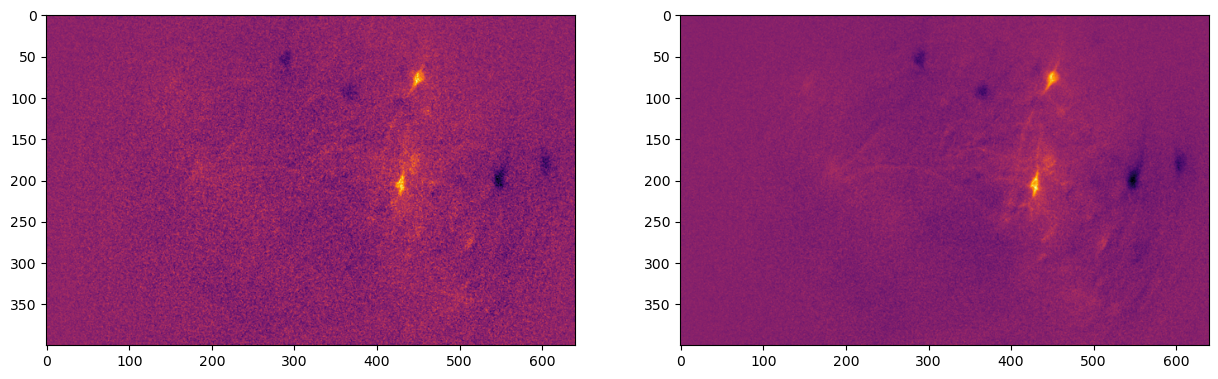

In [31]:
fig, axs = plt.subplots(1,2, figsize=(15,15))

axs[0].imshow(dff(full_stack[30,:,:]))
axs[1].imshow(np.mean(dff(get_similar(full_stack, 30, 5)), axis=0))

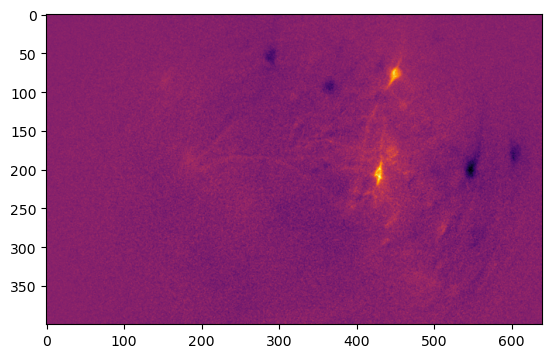

In [32]:
plt.imshow(np.mean(dff(get_similar(full_stack, 30, 5)), axis=0).astype(np.uint8))

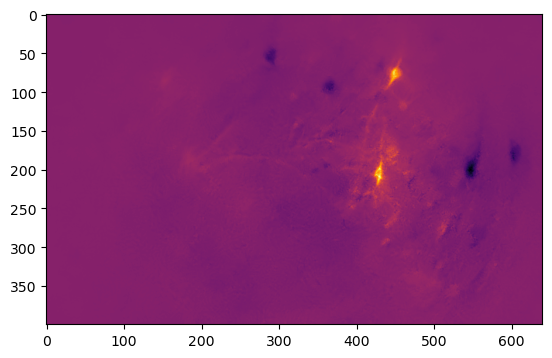

In [33]:
out_image = np.empty_like(np.mean(dff(get_similar(full_stack, 30, 5)), axis=0).astype(np.uint8))
cv2.fastNlMeansDenoising(np.mean(dff(get_similar(full_stack, 30, 5)), axis=0).astype(np.uint8), out_image, h=4)

plt.imshow(out_image)

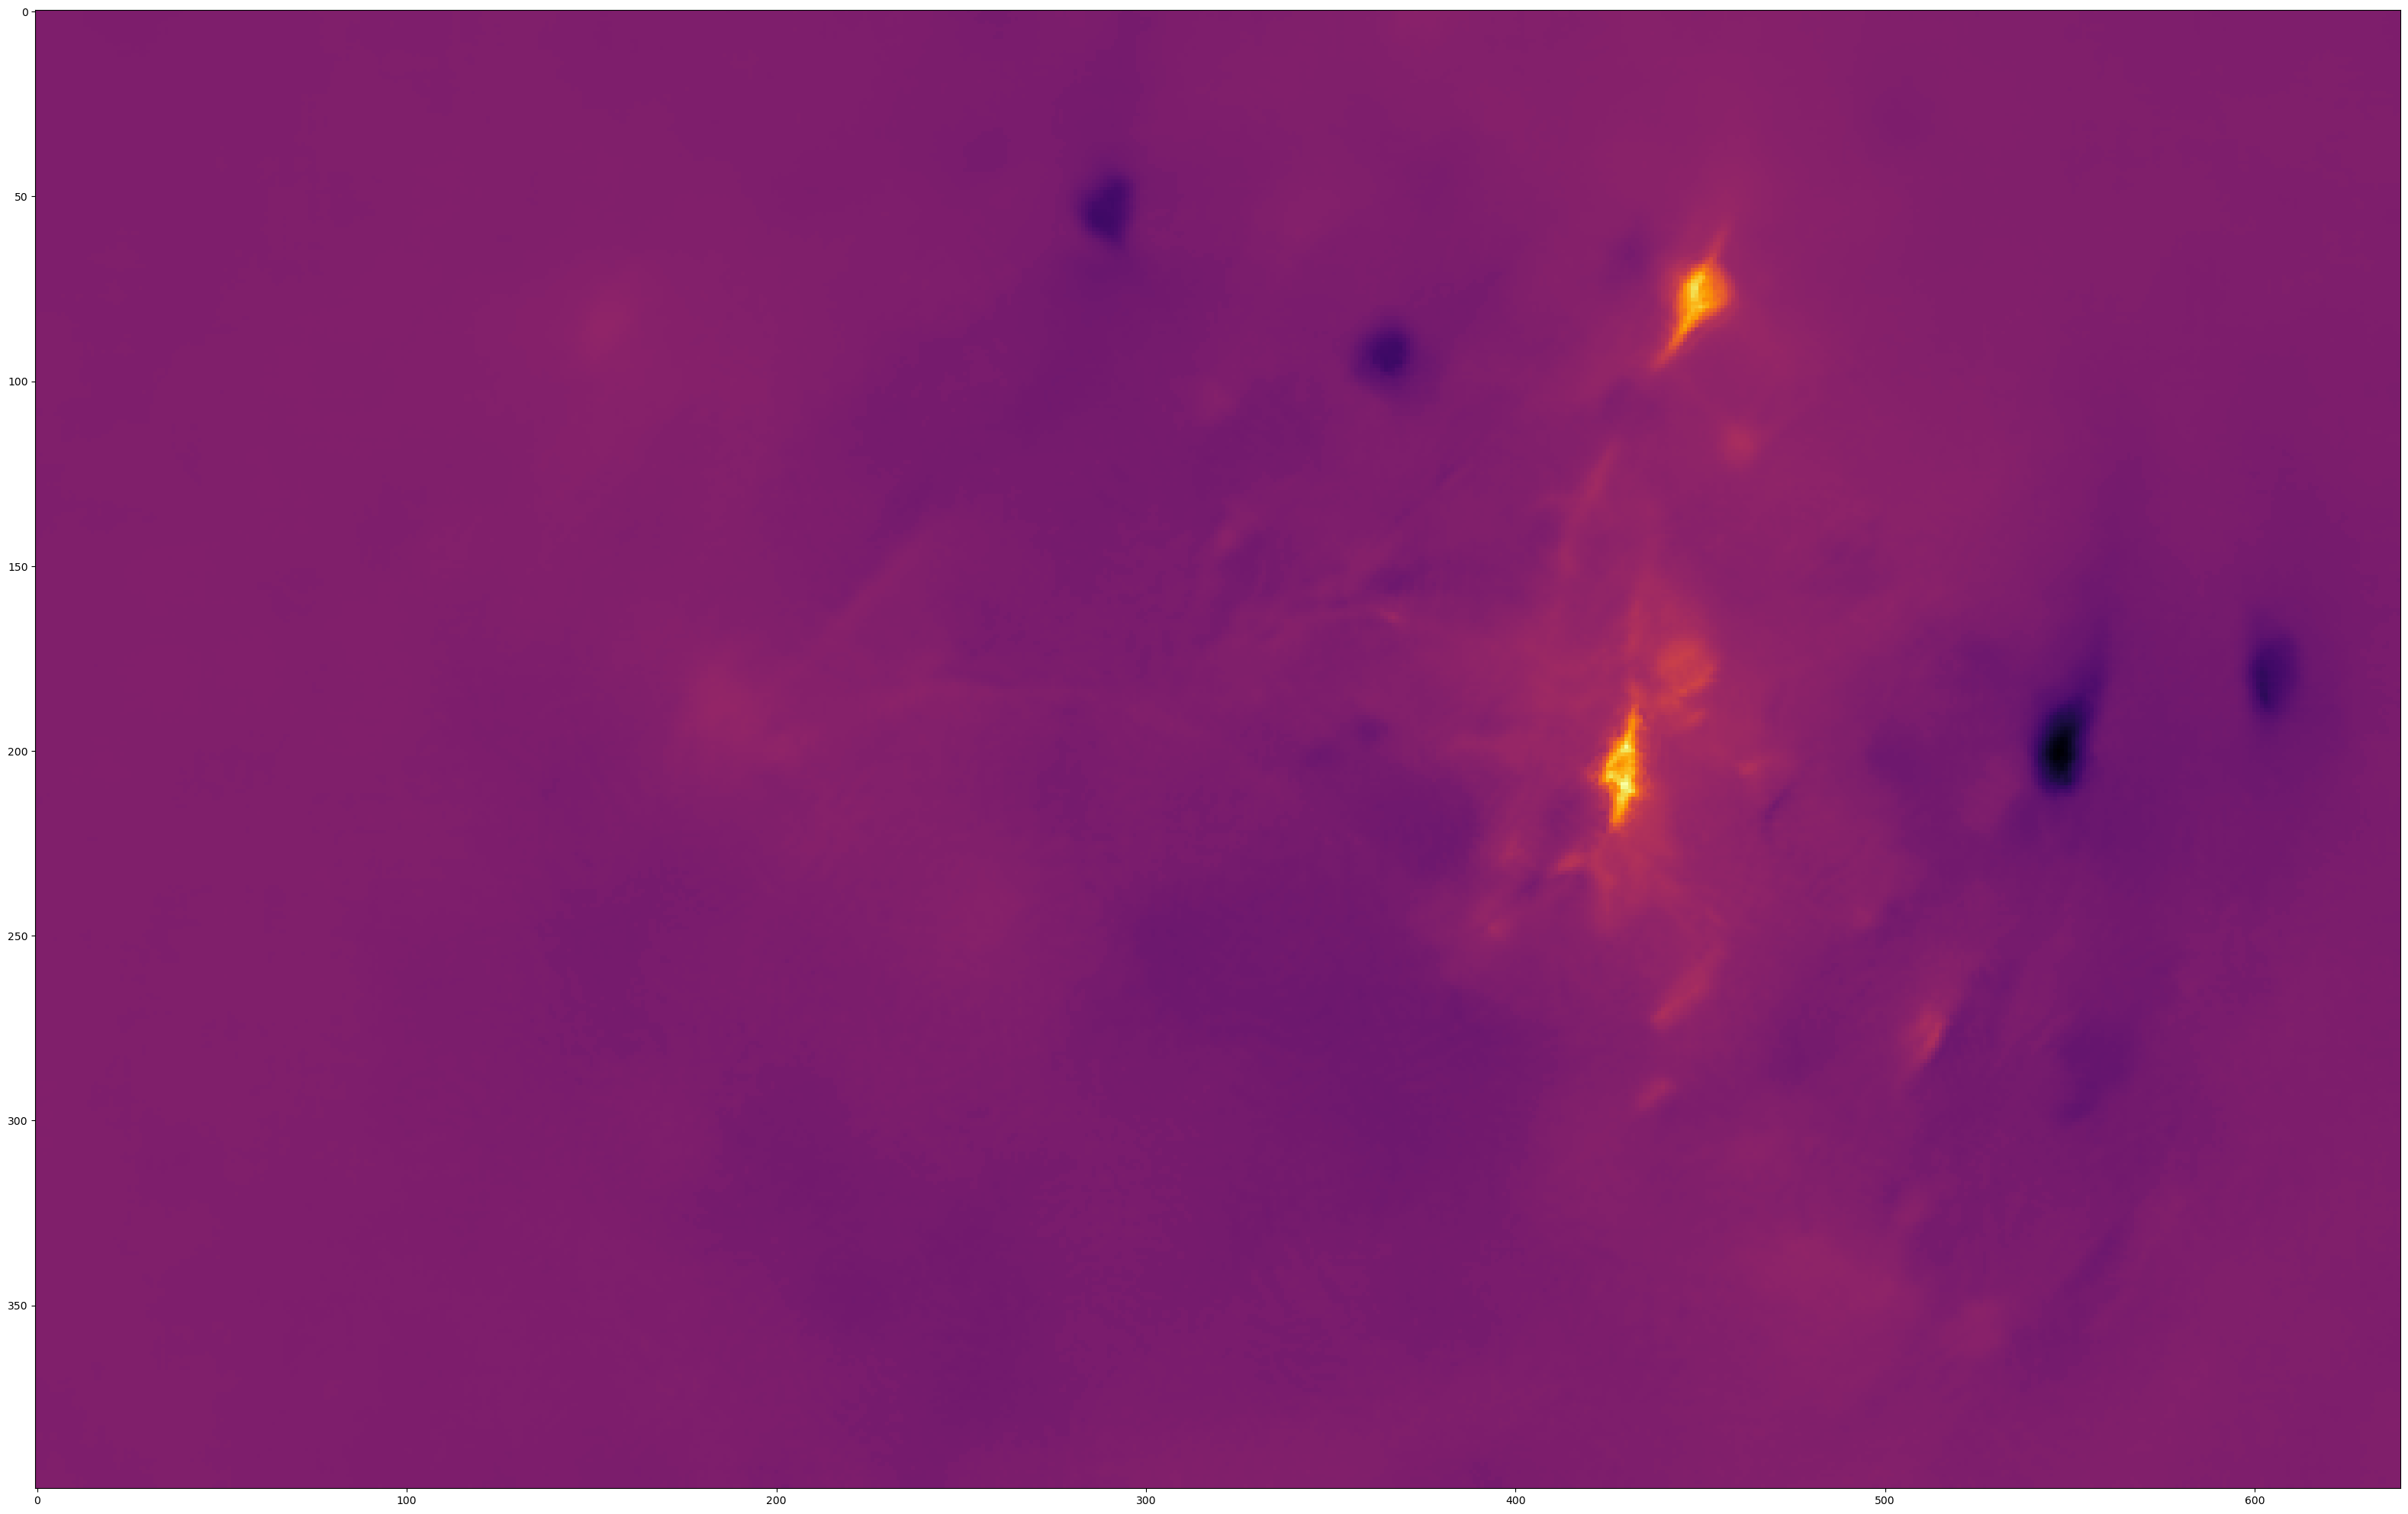

In [34]:
import denoising
plt.figure(figsize=(40,64))
plt.imshow(denoising.full_denoising(full_stack, 30, background, h=7))

Text(0.5, 1.0, 'denoised image')

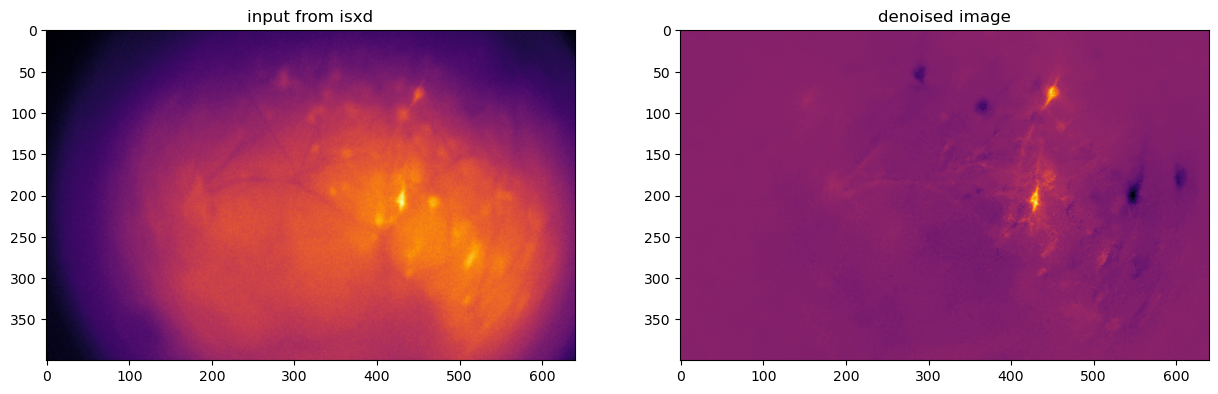

In [35]:
fig, axs = plt.subplots(1,2, figsize=(15,15))

axs[0].imshow(isxd_reader.load_image2(movie_path, index = 30))
axs[0].set_title("input from isxd")
axs[1].imshow(out_image)
axs[1].set_title("denoised image")

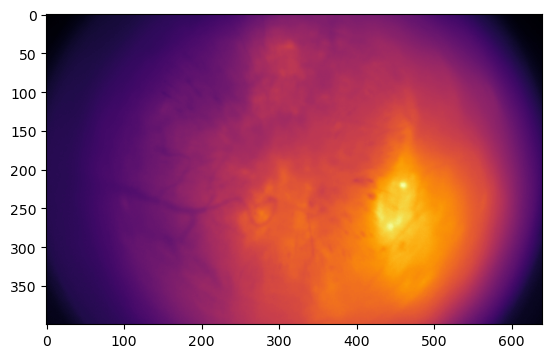

In [36]:
bgpath = "2022-10-06-09-50-22_video.isxd"

# background_nosig = isxd_reader.mean_of_images(bgpath)
background_nosig = np.mean(isxd_reader.img_stack(bgpath), axis = 0)

plt.imshow(background_nosig)

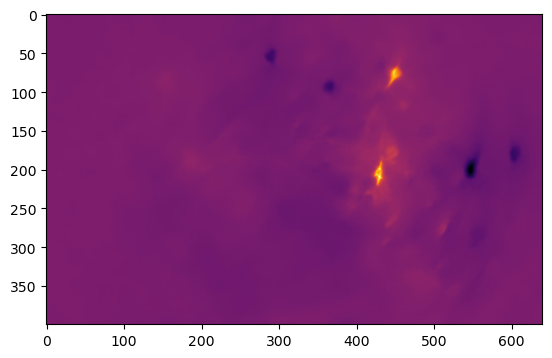

In [37]:
plt.imshow(denoising.full_denoising(full_stack, 30, background, h=10))

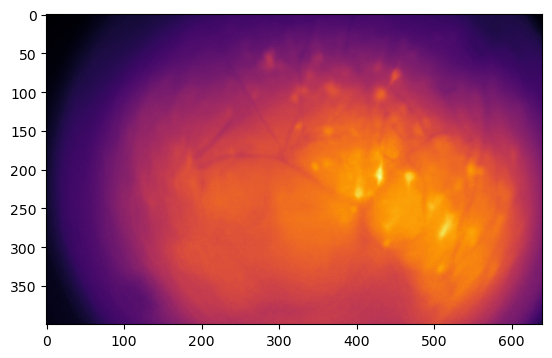

In [38]:
plt.imshow(background)

### Generate a bunch of images for testing, save all
Now, we'll generate a bunch of denoised images for testing the multiwienernet on denoised images

In [39]:
denoising.full_denoising(full_stack, 30, background, h=7).dtype

dtype('uint8')

In [40]:
import imageio
# # savepath = "../denoised_real_images/"
savepath = "../noisy_real_images/"
for image_num in range(full_stack.shape[0]):
    print(image_num)
    imageio.imwrite(savepath + str(image_num) + ".png", full_stack[image_num])
#     imageio.imwrite(savepath + str(image_num) + ".png", denoising.full_denoising(full_stack, image_num, background, h=7))

Lossy conversion from float64 to uint8. Range [237.0, 1369.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1365.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1359.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1357.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1367.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [236.0, 1358.0]. Convert image to uint8 prior to saving to suppress this warning.


0
1
2
3
4
5


Lossy conversion from float64 to uint8. Range [239.0, 1404.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1394.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1412.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1443.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1462.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [241.0, 1487.0]. Convert image to uint8 prior to saving to suppress this warning.


6
7
8
9
10
11


Lossy conversion from float64 to uint8. Range [238.0, 1502.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [241.0, 1491.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1486.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1486.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1485.0]. Convert image to uint8 prior to saving to suppress this warning.


12
13
14
15
16


Lossy conversion from float64 to uint8. Range [239.0, 1481.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1481.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1479.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1476.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [239.0, 1483.0]. Convert image to uint8 prior to saving to suppress this warning.


17
18
19
20
21


Lossy conversion from float64 to uint8. Range [238.0, 1524.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1501.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [236.0, 1530.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1538.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1551.0]. Convert image to uint8 prior to saving to suppress this warning.


22
23
24
25
26


Lossy conversion from float64 to uint8. Range [238.0, 1573.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1599.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1613.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1606.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1622.0]. Convert image to uint8 prior to saving to suppress this warning.


27
28
29
30
31


Lossy conversion from float64 to uint8. Range [241.0, 1648.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1660.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [236.0, 1683.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [241.0, 1662.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1669.0]. Convert image to uint8 prior to saving to suppress this warning.


32
33
34
35
36


Lossy conversion from float64 to uint8. Range [238.0, 1645.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1643.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1642.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1633.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1612.0]. Convert image to uint8 prior to saving to suppress this warning.


37
38
39
40
41


Lossy conversion from float64 to uint8. Range [231.0, 1589.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [234.0, 1604.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1608.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [228.0, 1608.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [239.0, 1610.0]. Convert image to uint8 prior to saving to suppress this warning.


42
43
44
45
46


Lossy conversion from float64 to uint8. Range [238.0, 1581.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [239.0, 1584.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [236.0, 1565.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1583.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1580.0]. Convert image to uint8 prior to saving to suppress this warning.


47
48
49
50
51


Lossy conversion from float64 to uint8. Range [235.0, 1585.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1598.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1572.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [239.0, 1543.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [236.0, 1593.0]. Convert image to uint8 prior to saving to suppress this warning.


52
53
54
55
56


Lossy conversion from float64 to uint8. Range [235.0, 1556.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [236.0, 1588.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [239.0, 1537.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1555.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [233.0, 1537.0]. Convert image to uint8 prior to saving to suppress this warning.


57
58
59
60
61


Lossy conversion from float64 to uint8. Range [236.0, 1514.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [237.0, 1529.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [234.0, 1535.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1492.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [234.0, 1486.0]. Convert image to uint8 prior to saving to suppress this warning.


62
63
64
65
66


Lossy conversion from float64 to uint8. Range [236.0, 1479.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [239.0, 1484.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [241.0, 1487.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1481.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [239.0, 1499.0]. Convert image to uint8 prior to saving to suppress this warning.


67
68
69
70
71


Lossy conversion from float64 to uint8. Range [236.0, 1469.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [239.0, 1463.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1476.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [238.0, 1450.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [240.0, 1457.0]. Convert image to uint8 prior to saving to suppress this warning.


72
73
74
75
76


Lossy conversion from float64 to uint8. Range [243.0, 1483.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [235.0, 1447.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [242.0, 1440.0]. Convert image to uint8 prior to saving to suppress this warning.


77
78
79


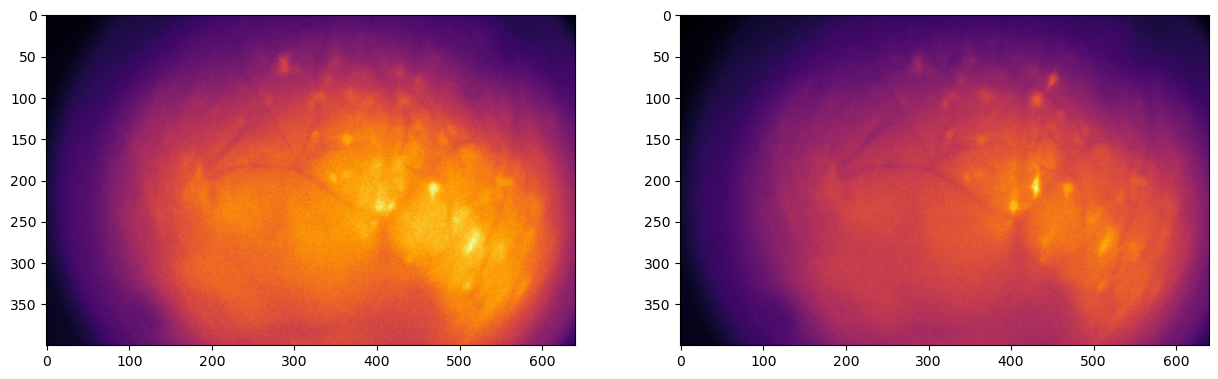

In [41]:
fig, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(full_stack[0])
axs[1].imshow(full_stack[38])

/tmp/ipykernel_10000/1528814177.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(savepath + "10.png"))


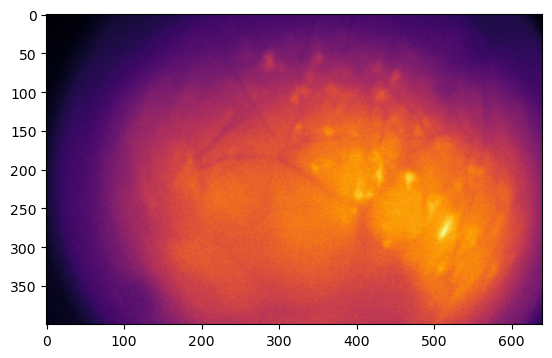

In [42]:
plt.imshow(imageio.imread(savepath + "10.png"))

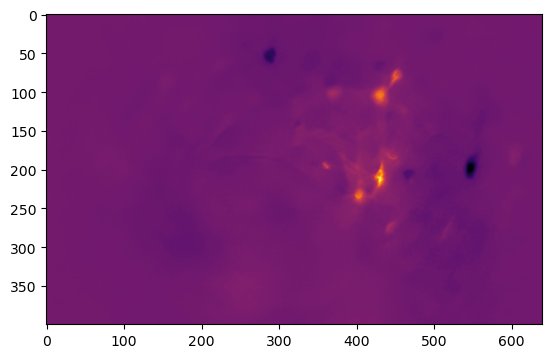

In [43]:
plt.imshow(denoising.full_denoising(full_stack, 38, background, h=7))

### Characterizing noise
First, I'll attempt to calculate the noise by subtracting the locally-denoised image from the original image. I expect to see continous white noise throughout.

Text(0.5, 1.0, 'average of the 5 most similar images')

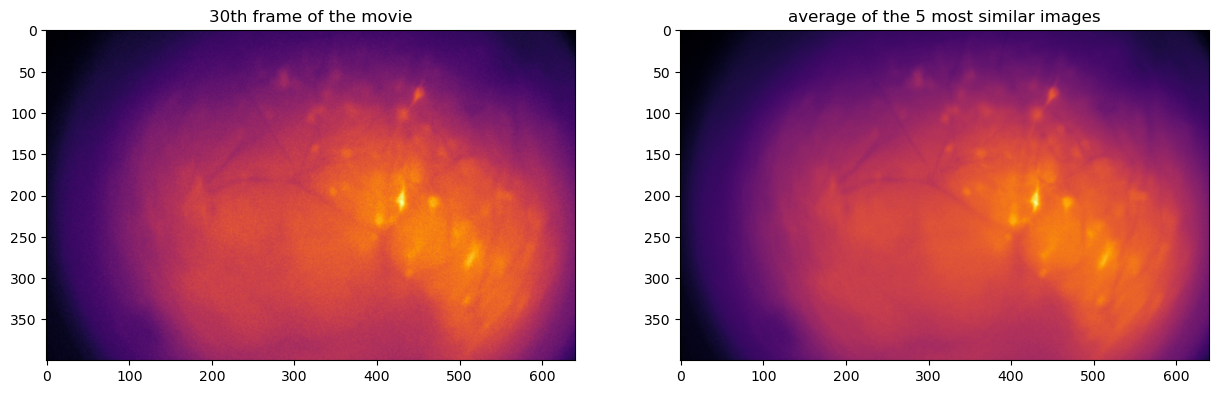

In [44]:
fig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(full_stack[30])
axs[0].set_title("30th frame of the movie")

axs[1].imshow(np.mean(denoising.get_similar(full_stack, 30, 5), axis=0))
axs[1].set_title("average of the 5 most similar images")

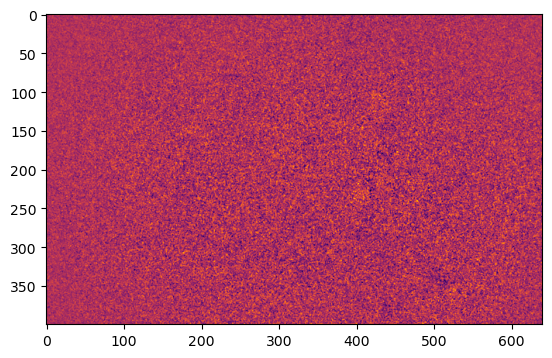

In [45]:
noise = np.mean(denoising.get_similar(full_stack, 30, 5), axis=0) - full_stack[30]
plt.imshow(noise)

(array([3.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00, 4.0000e+00,
        6.0000e+00, 6.0000e+00, 8.0000e+00, 1.5000e+01, 2.1000e+01,
        2.3000e+01, 2.3000e+01, 2.9000e+01, 4.7000e+01, 5.9000e+01,
        8.6000e+01, 9.8000e+01, 1.3700e+02, 1.5200e+02, 2.1900e+02,
        2.9700e+02, 3.2000e+02, 4.3300e+02, 5.7000e+02, 6.0300e+02,
        8.3400e+02, 1.0350e+03, 1.2050e+03, 1.3020e+03, 1.8240e+03,
        2.1720e+03, 2.2160e+03, 3.1050e+03, 3.6270e+03, 3.6710e+03,
        4.7250e+03, 5.5000e+03, 5.2600e+03, 6.9720e+03, 7.8180e+03,
        7.4770e+03, 9.4750e+03, 1.0436e+04, 9.4160e+03, 1.1776e+04,
        1.2186e+04, 1.0718e+04, 1.2590e+04, 1.2540e+04, 1.0223e+04,
        1.1460e+04, 1.0534e+04, 9.8210e+03, 7.6530e+03, 8.2050e+03,
        7.2210e+03, 5.5300e+03, 5.7140e+03, 4.8490e+03, 3.5270e+03,
        3.7400e+03, 3.1120e+03, 2.2640e+03, 2.1730e+03, 1.8380e+03,
        1.2820e+03, 1.1910e+03, 9.9100e+02, 6.9600e+02, 6.7000e+02,
        4.9900e+02, 3.3300e+02, 3.5900e+02, 2.39

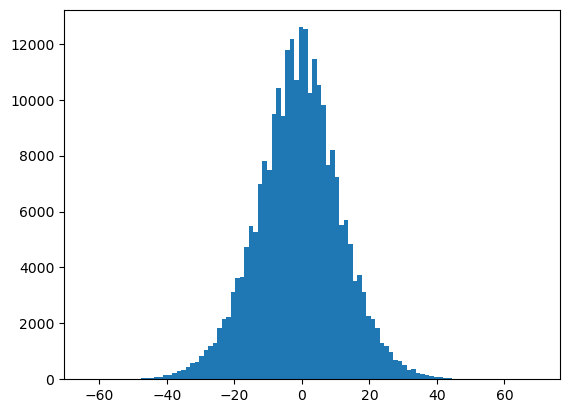

In [46]:
plt.hist(np.ravel(noise), bins=100)

We see that the noise added to get the instantaneous image from the locally denoised image with `num_images = 5` is approximately Gaussian and seemingly white (from the image before last, as there is no discernable pattern to the spatial distribution of the noise). The next question is, how is the e.g. stdev of the noise related to the number of images that are locally averaged? This would give a good idea of the actual noise.

$y_1 = x + n_t = y_2 + n_1$

$y_2 = x + n_2$

Above, we know that $x$ is the pure signal, $y_1$ is the instantaneous image and $y_2$ is the locally-averaged image. Above, we have been able to calculate $y_2$ and thus $n_1$. However, we cannot so far obtain $n_2$. I am hoping that we can introduce another equation:

$y_2 = y_3 + n_3$

Then somehow relate $n_3$ to $n_2$ by a statistical property and thus end up with two equations in two unknowns.

### Statistics' answer:
It turns out that I just don't know anything about statistics. The Central Limit Theorem says that:

$dist(\overline{X_n}) \approx \mathcal{N}(\mu, \sigma^2/n)$

Now, say that the instantaneous image at a particular pixel is the random sample $X_i$, and the signal at that pixel is $\mu$.

$X_i = \mu + \Delta_i$

Where $\Delta_i$ is a random sample with a mean of 0 and variance of $\sigma^2$.
Then, let $\overline{X_n}$ be the mean of $n$ of these random samples of the sample space from which $X_i$ is drawn.

$X_i - \overline{X_n} = \mu + \Delta_i - \frac{1}{n}\sum_{j=1}^n(\mu + \Delta_{j}) = \Delta_i - \overline{\Delta_n} \approx \mathcal{N}(\Delta_i, \sigma^2/n)$.

Thus, we don't have to take multiple different averages; we simply can multiply the variance of the distribution whose histogram is plotted above by $n = 5$.

$\implies \sigma = {\hat{\sigma}}{\sqrt{n}} \approx 28$

In [47]:
np.var(np.ravel(noise))*5

774.0246909013397

In [48]:
np.sqrt(np.var(np.ravel(noise))*5)

27.821299231008958

In [49]:
np.max(full_stack.astype(np.uint16))

1683

In [50]:
2**16

65536

Therefore, the random noise added to the image, in addition to the background is a Gaussian distribution with a variance of about 774.

In [51]:
clear_img = imageio.imread("/home/dshteinbok/MultiWienerNet/data/nV3_resized/100.png")

/tmp/ipykernel_10000/3400548759.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  clear_img = imageio.imread("/home/dshteinbok/MultiWienerNet/data/nV3_resized/100.png")


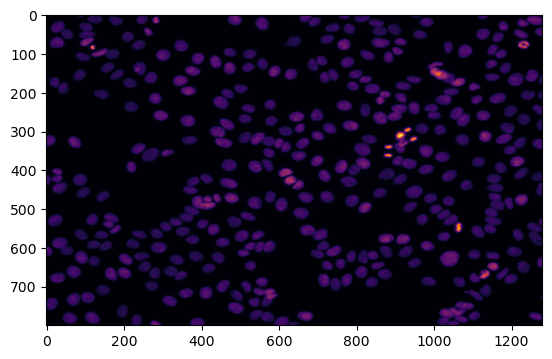

In [52]:
plt.imshow(clear_img)

In [53]:
np.max(clear_img)

253

In [54]:
clear_img.dtype

dtype('uint8')

In [55]:
np.pad?

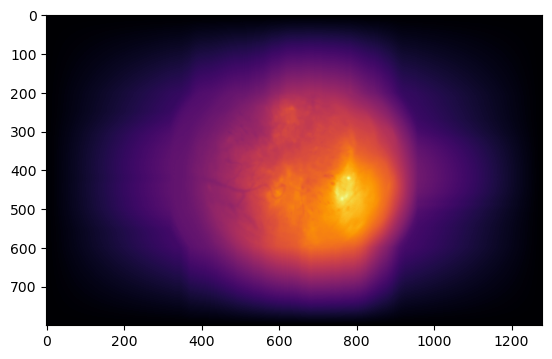

In [56]:
plt.imshow(np.pad(background_nosig.astype(np.uint16), ((200, 200), (320, 320)), mode='linear_ramp'))

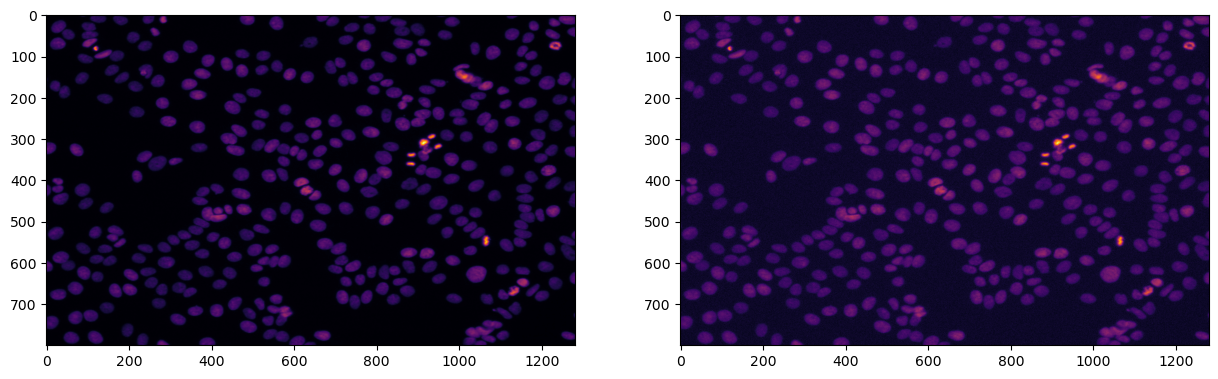

In [57]:
fig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(clear_img)
axs[1].imshow(np.random.normal(0, 28*np.max(clear_img)/np.max(full_stack), (800,1280)) + clear_img)

In [58]:
28*np.max(clear_img)/np.max(full_stack)

4.209150326797386

In [59]:
background.max()

1478.7750000000003

In [60]:
np.mean(full_stack, axis=0).dtype

dtype('float64')

In [61]:
full_stack.dtype

dtype('float64')

In [62]:
np.max(full_stack)

1683.0